<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Machine Learning Model</b></div>

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Import </b> Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.preprocessing

from tensorflow import keras
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

print('Setup Complete!')

Setup Complete!


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Data </b> Preparation

In [49]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head(2)

,name,description,designer,artist,publisher,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,family,year,average_rating
0,Samurai,Dispute the favor of three different castes in...,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück + 15 more",2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Area Majority / Influence,Components: Map (Continental / National scale)...,1998,7.5
1,Samurai,Dispute the favor of three different castes in...,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück + 15 more",2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hand Management,Components: Map (Continental / National scale)...,1998,7.5


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41927 entries, 0 to 41926
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               41927 non-null  object 
 1   description        41927 non-null  object 
 2   designer           41927 non-null  object 
 3   artist             41927 non-null  object 
 4   publisher          41927 non-null  object 
 5   min_players        41927 non-null  int64  
 6   max_players        41927 non-null  int64  
 7   min_playtime       41927 non-null  int64  
 8   max_playtime       41927 non-null  int64  
 9   playing_time       41927 non-null  int64  
 10  min_age            41927 non-null  int64  
 11  complexity_rating  41927 non-null  float64
 12  user_ratings       41927 non-null  int64  
 13  user_comments      41927 non-null  int64  
 14  type               41927 non-null  object 
 15  category           41927 non-null  object 
 16  mechanism          419

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Feature </b> engineering

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Dropping some meaningless columns</b></span>

In [51]:
df = df.drop(columns=['name', 'description', 'designer', 'artist', 'publisher', 'family', 'year'], axis=1, inplace=False)
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Area Majority / Influence,7.5
1,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hand Management,7.5
2,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hexagon Grid,7.5
3,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Once-Per-Game Abilities,7.5
4,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Set Collection,7.5


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Converting data to float in column type, category and mechanism</b></span>

In [52]:
def convertCategoryToIndex(value, category):
    return category.index(value)

In [53]:
df['average_rating'] = df['average_rating'] * 10
df['average_rating'] = df['average_rating'].astype('int')
df['type'] = df['type'].apply(convertCategoryToIndex, category = list(df['type'].unique()))
df['category'] = df['category'].apply(convertCategoryToIndex, category = list(df['category'].unique()))
df['mechanism'] = df['mechanism'].apply(convertCategoryToIndex, category = list(df['mechanism'].unique()))

In [54]:
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,0,0,0,75
1,2,4,30,60,45,10,2.47,16000,4000,0,0,1,75
2,2,4,30,60,45,10,2.47,16000,4000,0,0,2,75
3,2,4,30,60,45,10,2.47,16000,4000,0,0,3,75
4,2,4,30,60,45,10,2.47,16000,4000,0,0,4,75


## 
> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Scaling data by min-max scaler</b></span>

In [55]:
columns = df.columns[:-1]
for column in columns:
    scaler = sklearn.preprocessing.MinMaxScaler()
    df[column] = scaler.fit_transform(df[column].to_numpy().reshape(-1, 1))

In [56]:
df = df.sample(frac=1, replace = False)

In [57]:
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
3630,0.285714,0.040404,0.082058,0.123783,0.102921,0.285714,0.365,0.152341,0.30000,0.00,0.071429,0.548913,69
31492,0.142857,0.111111,0.040334,0.040334,0.040334,0.214286,0.000,0.000762,0.00150,0.25,0.500000,0.005435,69
27032,0.142857,0.040404,0.040334,0.061196,0.050070,0.142857,0.000,0.000000,0.00025,0.25,0.000000,0.146739,60
29101,0.142857,0.050505,0.165508,0.332406,0.248957,0.357143,0.000,0.000619,0.00175,0.25,0.273810,0.000000,75
40468,0.000000,0.000000,0.040334,0.061196,0.050070,0.285714,0.500,0.000619,0.00225,0.75,0.273810,0.163043,65


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Spliting data into train and test data</b></span>

In [58]:
train_sample, test_sample = df.iloc[:round(df.shape[0] * 0.8)][:], df.iloc[round(df.shape[0] * 0.8):][:]

In [59]:
print(f"Train shape: {train_sample.shape}")
print(f"Test shape: {test_sample.shape}")

Train shape: (33542, 13)
Test shape: (8385, 13)


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Training </b> model

In [60]:
def getTrainValSample(data, fold):
    beginPos = round(data.shape[0] * fold / 10)
    length = round(data.shape[0] * 1 / 10)

    train = pd.concat([data.iloc[0 : beginPos][:], data.iloc[beginPos + length:][:]]).to_numpy()
    val = data.iloc[beginPos: beginPos + length][:].to_numpy()

    x_train, y_train = train[:, :-1], train[:, -1]
    x_val, y_val = val[:, :-1], val[:, -1]
    return (x_train, y_train), (x_val, y_val)

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Model Decision Tree</b></span>

In [61]:
train_errors_decision_tree = []
val_errors_decision_tree = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = DecisionTreeClassifier(criterion="gini")
    model.fit(train[0], train[1])
    train_errors_decision_tree.append(model.score(train[0], train[1]))
    val_errors_decision_tree.append(model.score(val[0], val[1]))
    
decisionModel = pd.DataFrame({'Train Accuracy': train_errors_decision_tree,
                 'Validation Accuracy': val_errors_decision_tree
                 })

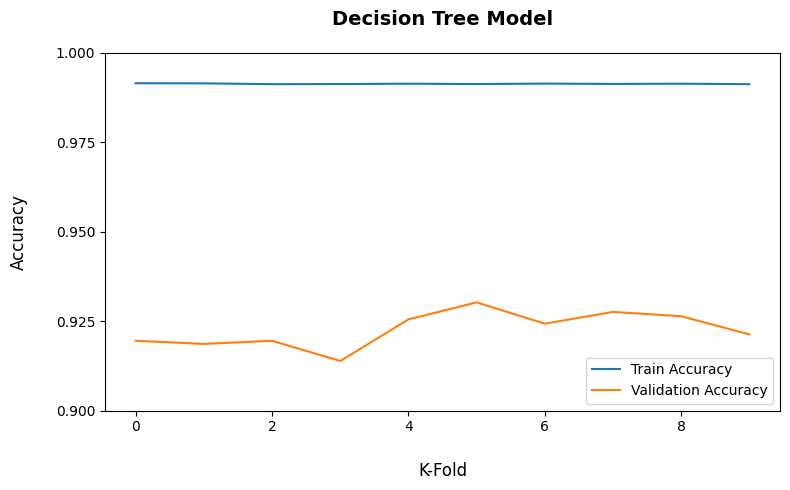

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))

decision_tree_train_line, = ax.plot(decisionModel['Train Accuracy'])
decision_tree_val_line, = ax.plot(decisionModel['Validation Accuracy'])

ax.set_title("Decision Tree Model", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("K-Fold", fontsize=12, labelpad=20)
ax.set_ylabel("Accuracy", fontsize=12, labelpad=20)
ax.set_yticks(np.linspace(0.9, 1, num=5))
ax.legend([decision_tree_train_line, decision_tree_val_line], decisionModel.columns, loc = "lower right")

plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Model Naive-Bayes</b></span>

In [63]:
train_errors_bayes = []
val_errors_bayes = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = GaussianNB()
    model.fit(train[0], train[1])
    train_errors_bayes.append(model.score(train[0], train[1]))
    val_errors_bayes.append(model.score(val[0], val[1]))
    
BayesModel = pd.DataFrame({'Train Accuracy': train_errors_bayes,
                 'Validation Accuracy': val_errors_bayes
                 })

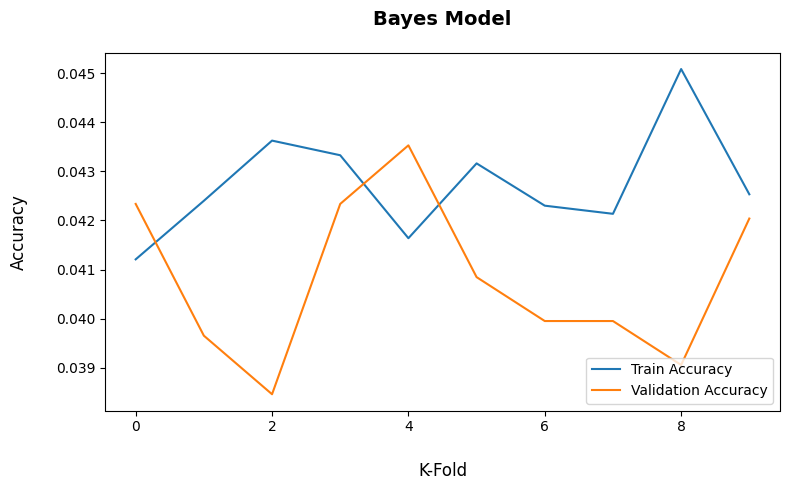

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))
bayes_train_line, = ax.plot(BayesModel['Train Accuracy'])
bayes_val_line, = ax.plot(BayesModel['Validation Accuracy'])

ax.set_title("Bayes Model", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("K-Fold", fontsize=12, labelpad=20)
ax.set_ylabel("Accuracy", fontsize=12, labelpad=20)
ax.legend([bayes_train_line, bayes_val_line], BayesModel.columns, loc = "lower right")

plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Model FC</b></span>

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* **First hidden layer:** 1024 node, use 'relu' activation
* **Second hidden layer:** 512 node, use 'relu' activation
* **Output layer:** 101 node, use 'softmax' activation

</div>



In [65]:
train_errors_FC = []
val_errors_FC = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    x_train = tf.convert_to_tensor(train[0], dtype='float32')
    y_train = tf.convert_to_tensor(train[1])
    x_val = tf.convert_to_tensor(val[0], dtype='float32')
    y_val = tf.convert_to_tensor(val[1])

    model = keras.Sequential(
            [
                keras.Input(shape=(12, ), name = "Input"),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(1024, activation='relu'),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(101, activation='softmax', name = 'output'),
            ]
        )
    model.compile(
            optimizer=keras.optimizers.SGD(),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseTopKCategoricalAccuracy()]
        )
    history = model.fit(x_train, 
                                y_train,
                                batch_size=32,
                                epochs=5,
                                validation_data=(x_val, y_val),
                            )
    
    train_errors_FC.append(history.history['val_sparse_top_k_categorical_accuracy'][-1])
    val_errors_FC.append(history.history['sparse_top_k_categorical_accuracy'][-1])
    
FCModel = pd.DataFrame({'Train Accuracy': train_errors_FC,
                 'Validation Accuracy': val_errors_FC
                 })

Epoch 1/5
944/944 [==============================] - 8s 8ms/step - loss: 4.2868 - sparse_top_k_categorical_accuracy: 0.2023 - val_loss: 3.9239 - val_sparse_top_k_categorical_accuracy: 0.2132
Epoch 2/5
944/944 [==============================] - 7s 7ms/step - loss: 3.8936 - sparse_top_k_categorical_accuracy: 0.2123 - val_loss: 3.8677 - val_sparse_top_k_categorical_accuracy: 0.2275
Epoch 3/5
944/944 [==============================] - 8s 9ms/step - loss: 3.8666 - sparse_top_k_categorical_accuracy: 0.2134 - val_loss: 3.8498 - val_sparse_top_k_categorical_accuracy: 0.2248
Epoch 4/5
944/944 [==============================] - 8s 9ms/step - loss: 3.8503 - sparse_top_k_categorical_accuracy: 0.2202 - val_loss: 3.8391 - val_sparse_top_k_categorical_accuracy: 0.2177
Epoch 5/5
944/944 [==============================] - 9s 9ms/step - loss: 3.8303 - sparse_top_k_categorical_accuracy: 0.2281 - val_loss: 3.8106 - val_sparse_top_k_categorical_accuracy: 0.2516
Epoch 1/5
944/944 [==========================

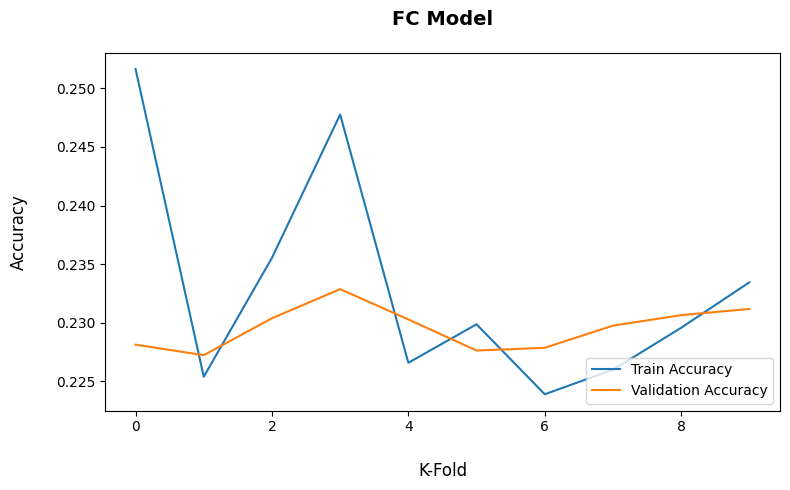

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))

FC_model_train_line, = ax.plot(FCModel['Train Accuracy'])
FC_model_val_line, = ax.plot(FCModel['Validation Accuracy'])

ax.set_title("FC Model", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("K-Fold", fontsize=12, labelpad=20)
ax.set_ylabel("Accuracy", fontsize=12, labelpad=20)
ax.legend([FC_model_train_line, FC_model_val_line], FCModel.columns, loc = "lower right")

plt.tight_layout()
plt.show()

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Evaluation </b>

In [67]:
compare_model = {
    'Decision Tree': decisionModel['Validation Accuracy'].mean(),
    'Naive-Bayes': BayesModel['Validation Accuracy'].mean(),
    'FC Model': FCModel['Validation Accuracy'].mean()
}

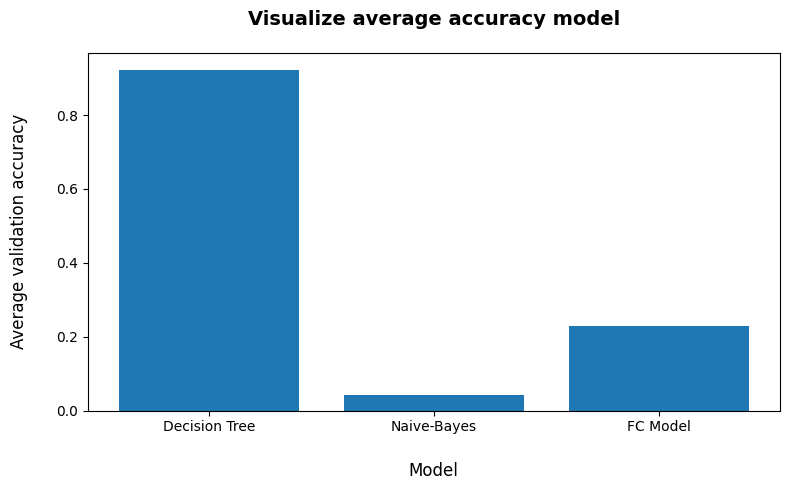

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("Visualize average accuracy model", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Model", fontsize=12, labelpad=20)
ax.set_ylabel("Average validation accuracy", fontsize=12, labelpad=20)
ax.bar(compare_model.keys(), compare_model.values())

plt.tight_layout()
plt.show()

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* As we see, 3 model will train are compared using k-fold cross validation and model Decision tree give a highest accurancy. So, we will use Decision Tree model to solve our problem

</div>



In [69]:
x_train, y_train = train_sample.iloc[:, :-1], train_sample.iloc[:, -1:]
x_test, y_test = test_sample.iloc[:, :-1], test_sample.iloc[:, -1:]
print(f"x_train shape: {x_train.shape}\n"
      f"y_train shape: {y_train.shape}"
      )

x_train shape: (33542, 12)
y_train shape: (33542, 1)


In [70]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
model.get_depth()

42

In [71]:
y_train_pred = model.predict(x_train)
report = classification_report(y_true=y_train, y_pred=y_train_pred, labels = model.classes_)
print(report)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00       129
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         2
          20       0.99      1.00      0.99       172
          21       1.00      1.00      1.00         1
          23       1.00      1.00      1.00        27
          24       1.00      1.00      1.00         6
          25       0.96      0.61      0.74        38
          26       1.00      1.00      1.00         4
          27       1.00      1.00      1.00        12
          28       1.00      1.00      1.00         5
          29       1.00      1.00      1.00        29
          30       0.98      1.00      0.99       216
          31       1.00    

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Prediction </b>

In [72]:
y_pred = model.predict(x_test)
accuracy_predict = accuracy_score(y_test, y_pred)
print(f"accuracy test: {accuracy_predict}")

accuracy test: 0.9270125223613596


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Results </b> analysis

In [73]:
text_representation = sklearn.tree.export_text(model)
print(text_representation)

|--- feature_7 <= 0.00
|   |--- feature_7 <= 0.00
|   |   |--- feature_3 <= 0.15
|   |   |   |--- feature_2 <= 0.09
|   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |--- feature_1 <= 0.07
|   |   |   |   |   |   |--- feature_8 <= 0.00
|   |   |   |   |   |   |   |--- feature_6 <= 0.12
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.20
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |   |   |   |   |---

In [74]:
print(model.get_depth())

42


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* It is apparently seen that model after training get F1 score equal to 0.99 which is pretty good. Moreover, the tree is built with depth = 41, it will guarantee our model won't be over-fitting. This is represented clearly on test set with a high accuracy nearly 0.93. Generally, this model is evaluated quite well and it is likely to apply to our daily lives.

</div>



<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Conclusion </b> 

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* Decision Tree Classifier can be used by board game publishers to make more informed decisions about the types of games to create in the future. By understanding the factors that influence player ratings, publishers can create games that are more likely to be successful.

* Specific benefits of using this model include:

  * Improved game development efficiency: By understanding the factors that contribute to player satisfaction, publishers can reduce the time and resources required to develop new games.

  * Increased game marketability: By creating games that are more likely to be rated highly, publishers can increase their chances of success in the market.

  * Enhanced player satisfaction: By creating games that meet the needs of players, publishers can increase player satisfaction and loyalty.

</div>

